In [6]:
import pandas as pd
import imt
import numpy as np
from imt.utils.view import view, VisOptions
import tree

In [2]:
Ts = 1 / 60

acc1 = pd.read_csv("data/head_chest/chest.csv", sep=",", skiprows=11)[["Acc_X", "Acc_Y", "Acc_Z"]].to_numpy()
gyr1 = pd.read_csv("data/head_chest/chest.csv", sep=",", skiprows=11)[["Gyr_X", "Gyr_Y", "Gyr_Z"]].to_numpy()
mag1 = pd.read_csv("data/head_chest/chest.csv", sep=",", skiprows=11)[["Mag_X", "Mag_Y", "Mag_Z"]].to_numpy()
acc2 = pd.read_csv("data/head_chest/head.csv", sep=",", skiprows=11)[["Acc_X", "Acc_Y", "Acc_Z"]].to_numpy()
gyr2 = pd.read_csv("data/head_chest/head.csv", sep=",", skiprows=11)[["Gyr_X", "Gyr_Y", "Gyr_Z"]].to_numpy()
mag2 = pd.read_csv("data/head_chest/head.csv", sep=",", skiprows=11)[["Mag_X", "Mag_Y", "Mag_Z"]].to_numpy()

acc1, gyr1, mag1, acc2, gyr2, mag2 = imt.utils.crop_tail((acc1, gyr1, mag1, acc2, gyr2, mag2), 1 / Ts)
gyr1, gyr2 = np.deg2rad(gyr1), np.deg2rad(gyr2)

`crop_tail`: Crop off at t=45.78333333333333s


In [3]:
solver = imt.Solver([-1, 0], 
                    methods=[imt.methods.VQF(offline=True), 
                     imt.wrappers.JointPosition(imt.methods.VQF(offline=True))], 
                     Ts=Ts)
qhat, extras = solver.step({
    0: dict(acc=acc1, gyr=gyr1), 1: dict(acc=acc2, gyr=gyr2)
})

To save the video permanently, provide the path to where the .mp4 is  saved by specifying `offscreen_mode_options=dict(output_path=...)`



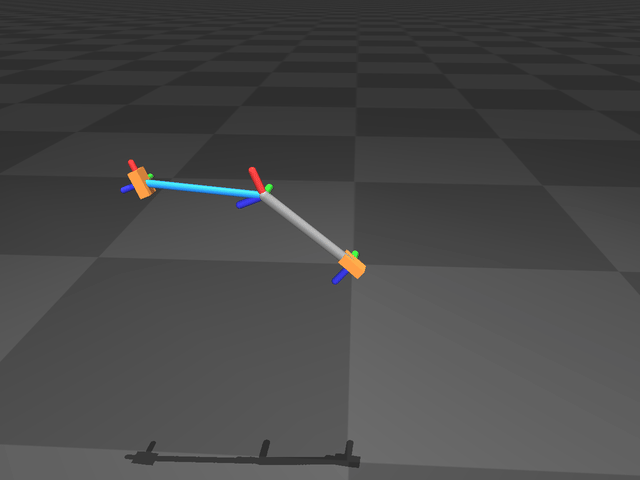

In [8]:
# show only the first 10 seconds
qhat = tree.map_structure(lambda a: a[:600], qhat)
pos = np.zeros((qhat[0].shape[0], 3))
pos[:, 2] = 0.5
view([-1, 0], qhat, extras, 1 / Ts, global_translation=pos, mode="offscreen", width=640, height=480,
               offscreen_mode_options=dict(camid=1, github=True), show_every_nth_frame=3, 
               vis_options=VisOptions(show_floor=True, floor_material="matplane"))